<a href="https://colab.research.google.com/github/AlexeyTri/Home_work_NN/blob/main/HomeWork_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, log_loss
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
import matplotlib.pyplot as plt
from collections.abc import Sequence
from skimage import metrics
from skimage.io import imread
import skimage
import pylab
from sklearn.cluster  import KMeans

array([[[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  55,   4],
        [  0,  53,   4],
        [  3,  55,   9]],

       [[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       [[  3, 125,   4],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       ...,

       [[121,  96,   6],
        [115,  90,   0],
        [115,  94,   3],
        ...,
        [  8,  21,  27],
        [ 12,  26,  37],
        [ 13,  28,  47]],

       [[116,  89,   0],
        [122,  97,   5],
        [113,  90,   0],
        ...,
        [  6,  21,  28],
        [ 18,  36,  48],
        [ 10,  28,  48]],

       [[124,  98,   5],
        [130, 105,  12],
        [121,  96,   4],
        ...,
        [  6,  23,  30],
        [ 21,  41,  52],
        [ 22,  40,  60]]], dtype=uint8)
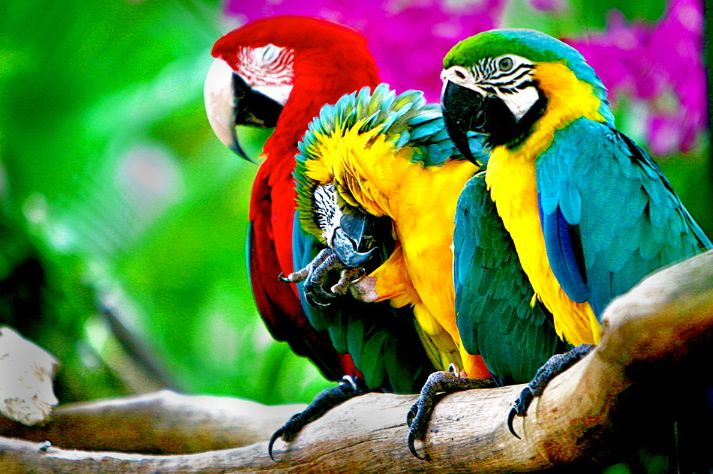

In [3]:
image = imread("/content/drive/MyDrive/parrots.jpg")
image

In [43]:
image_scale = skimage.img_as_float(image)

In [44]:
X = image_scale.reshape((-1, 3))

In [49]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
kmeans.fit(X)

KMeans(random_state=241)

In [134]:
image_scale_mean = np.zeros(X.shape)
image_scale_median = np.zeros(X.shape)

for dim in range(0, image_scale.shape[2]):

    for n_cluster in range(0, n_clusters):
        x_mean = X[kmeans.labels_ == n_cluster , dim].mean()
        x_median = np.median(X[kmeans.labels_ == n_cluster , dim])
        image_scale_mean[kmeans.labels_ == n_cluster , dim] = x_mean
        image_scale_median[kmeans.labels_ == n_cluster , dim] = x_median

In [135]:
new_mean_image = image_scale_mean.reshape(image_scale.shape)
new_median_image = image_scale_median.reshape(image_scale.shape)

In [136]:
psnr_mean = metrics.peak_signal_noise_ratio(image_scale, new_mean_image)
psnr_median = metrics.peak_signal_noise_ratio(image_scale, new_median_image)

In [137]:
psnr_mean, psnr_median

(np.float64(19.53540733418116), np.float64(19.229583966592656))

In [138]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
kmeans.fit(X)

labels_df = pd.DataFrame(kmeans.labels_)

image_scale_mean = np.zeros(X.shape)
image_scale_median = np.zeros(X.shape)

for dim in range(0, image_scale.shape[2]):

    for n_cluster in range(0, n_clusters):
        x_mean = X[kmeans.labels_ == n_cluster , dim].mean()
        x_median = np.median(X[kmeans.labels_ == n_cluster , dim])
        image_scale_mean[kmeans.labels_ == n_cluster , dim] = x_mean
        image_scale_median[kmeans.labels_ == n_cluster , dim] = x_median

new_mean_image = image_scale_mean.reshape(image_scale.shape)
new_median_image = image_scale_median.reshape(image_scale.shape)

psnr_mean = metrics.peak_signal_noise_ratio(image_scale, new_mean_image)
psnr_median = metrics.peak_signal_noise_ratio(image_scale, new_median_image)

psnr_mean, psnr_median

(np.float64(19.53540733418116), np.float64(19.229583966592656))

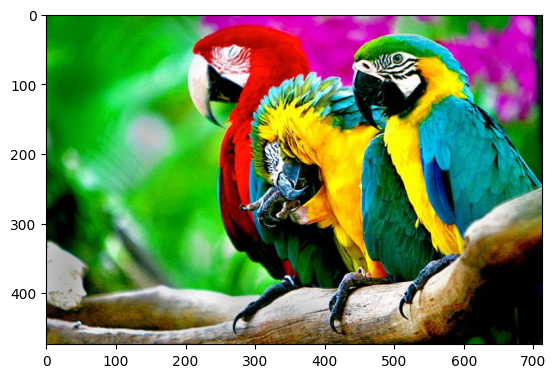

In [139]:
import pylab
pylab.imshow(image_scale)

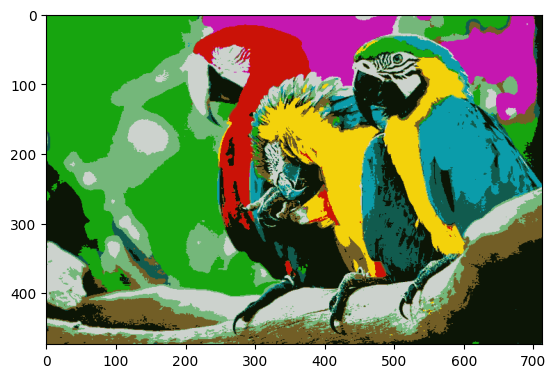

In [140]:
import pylab
pylab.imshow(new_mean_image)

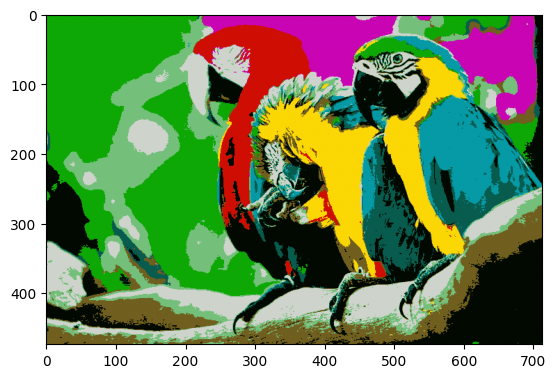

In [141]:
import pylab
pylab.imshow(new_median_image)